In [1]:
import numpy as np
import pandas as pd

In [2]:
import pandas_datareader as pdr
key="0d2742140da1186402077c574b6026778feb9993"

In [ ]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [ ]:
df.to_csv('AAPL.csv')

In [ ]:
df=pd.read_csv('AAPL.csv')

In [ ]:
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-11-08 00:00:00+00:00,111.06,111.720,109.70,110.310,24254179,26.131551,26.286844,25.811554,25.955082,97016716,0.00,1.0
1,AAPL,2016-11-09 00:00:00+00:00,110.88,111.320,108.05,109.880,59176361,26.089199,26.192727,25.423322,25.853907,236705444,0.00,1.0
2,AAPL,2016-11-10 00:00:00+00:00,107.79,111.090,105.83,111.090,57134541,25.362146,26.138610,24.900973,26.138610,228538164,0.00,1.0
3,AAPL,2016-11-11 00:00:00+00:00,108.43,108.870,106.55,106.920,34143898,25.512733,25.616261,25.070384,25.157442,136575592,0.00,1.0
4,AAPL,2016-11-14 00:00:00+00:00,105.71,107.809,104.08,107.320,51175504,24.872738,25.366616,24.489212,25.251559,204702016,0.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,AAPL,2021-11-01 00:00:00+00:00,148.96,149.700,147.80,148.985,73396551,148.743688,149.482614,147.585373,148.768652,73396551,0.00,1.0
1254,AAPL,2021-11-02 00:00:00+00:00,150.02,151.570,148.65,148.660,68922374,149.802149,151.349898,148.434139,148.444124,68922374,0.00,1.0
1255,AAPL,2021-11-03 00:00:00+00:00,151.49,151.970,149.82,150.390,54511534,151.270015,151.749317,149.602440,150.171612,54511534,0.00,1.0
1256,AAPL,2021-11-04 00:00:00+00:00,150.96,152.430,150.64,151.580,60394616,150.740784,152.208650,150.421249,151.359884,60394616,0.00,1.0


In [ ]:
df1=df.reset_index()['close']

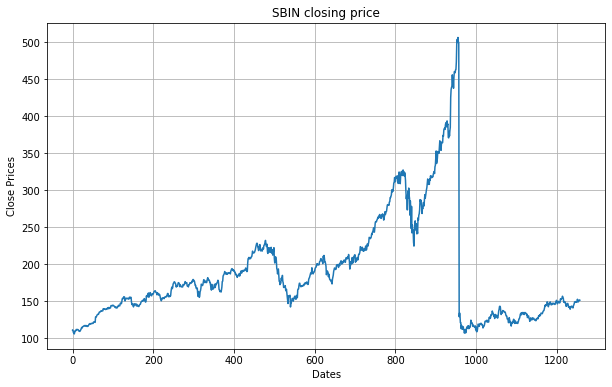

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(df['close'])
plt.title('SBIN closing price')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.01336231]
 [0.01291273]
 [0.00519506]
 ...
 [0.11434138]
 [0.11301763]
 [0.11381687]]


In [ ]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(817, 441)

In [ ]:
train_data

array([[0.01336231],
       [0.01291273],
       [0.00519506],
       [0.00679355],
       [0.        ],
       [0.00349668],
       [0.01068984],
       [0.01058994],
       [0.01086468],
       [0.01503572],
       [0.01521055],
       [0.0137869 ],
       [0.01518557],
       [0.0146361 ],
       [0.01436136],
       [0.01201359],
       [0.00944103],
       [0.01046506],
       [0.00849193],
       [0.01058994],
       [0.01328738],
       [0.01600979],
       [0.02058045],
       [0.01895699],
       [0.02367751],
       [0.02367751],
       [0.02525101],
       [0.02562566],
       [0.02729907],
       [0.02807333],
       [0.02834807],
       [0.0264249 ],
       [0.02699935],
       [0.02884759],
       [0.02759878],
       [0.02752385],
       [0.02525101],
       [0.02607523],
       [0.02575054],
       [0.02722414],
       [0.03047105],
       [0.03316849],
       [0.03346821],
       [0.03506669],
       [0.03381787],
       [0.03329337],
       [0.03569109],
       [0.035

In [ ]:
test_data

array([[0.53908787],
       [0.53424247],
       [0.55319946],
       [0.54737999],
       [0.5475798 ],
       [0.53271892],
       [0.54425795],
       [0.53596583],
       [0.51785803],
       [0.48071832],
       [0.45549228],
       [0.46690644],
       [0.41912683],
       [0.41872721],
       [0.48229182],
       [0.45858934],
       [0.4921075 ],
       [0.4675808 ],
       [0.45786503],
       [0.40076927],
       [0.44864878],
       [0.4238973 ],
       [0.35596184],
       [0.43024127],
       [0.34092612],
       [0.36752585],
       [0.35206554],
       [0.34734502],
       [0.30853189],
       [0.29636845],
       [0.35259004],
       [0.34919327],
       [0.38146261],
       [0.354738  ],
       [0.37239622],
       [0.37109746],
       [0.3376792 ],
       [0.34771967],
       [0.33892802],
       [0.39152805],
       [0.38393526],
       [0.40051951],
       [0.40531495],
       [0.41845247],
       [0.45291973],
       [0.44637594],
       [0.45202058],
       [0.442

In [ ]:

import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [ ]:

# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
12/12 [==============================] - 8s 285ms/step - loss: 0.0172 - val_loss: 0.0258
Epoch 2/50
12/12 [==============================] - 2s 189ms/step - loss: 0.0031 - val_loss: 0.0240
Epoch 3/50
12/12 [==============================] - 2s 186ms/step - loss: 0.0014 - val_loss: 0.0232
Epoch 4/50
12/12 [==============================] - 2s 181ms/step - loss: 7.7492e-04 - val_loss: 0.0268
Epoch 5/50
12/12 [==============================] - 2s 184ms/step - loss: 5.6215e-04 - val_loss: 0.0239
Epoch 6/50
12/12 [==============================] - 2s 180ms/step - loss: 5.0637e-04 - val_loss: 0.0235
Epoch 7/50
12/12 [==============================] - 2s 185ms/step - loss: 4.8929e-04 - val_loss: 0.0239
Epoch 8/50
12/12 [==============================] - 2s 177ms/step - loss: 4.6722e-04 - val_loss: 0.0227
Epoch 9/50
12/12 [==============================] - 2s 179ms/step - loss: 5.0526e-04 - val_loss: 0.0215
Epoch 10/50
12/12 [==============================] - 2s 181ms/step - loss: 4

In [ ]:
import tensorflow as tf

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

196.30433054420112

In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))

200.95985890472025

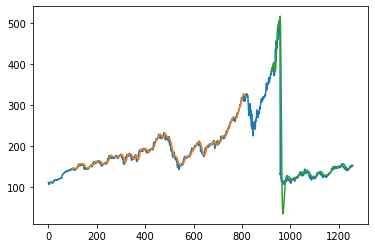

In [ ]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()